In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import re
# from autocorrect import spell
#import regex as re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D

Using TensorFlow backend.


In [2]:
data = pd.read_csv('1429_1.csv')
data.head()


len(data)

C:\Users\SatyaSPY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


34660

In [3]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()
  


,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [4]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [5]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [6]:
actualrating = mpermanent
actualrating.shape

(34620, 4)

In [7]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()

len(y)

34620

In [8]:
X = x['reviews.text']
print(X)

print(len(X))

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
5        This amazon fire 8 inch tablet is the perfect ...
6        Great for e-reading on the go, nice and light ...
7        I gave this as a Christmas gift to my inlaws, ...
8        Great as a device to read books. I like that i...
9        I love ordering books and reading them with th...
10       Not easy for elderly users cease of ads that p...
11       Excellent product. Easy to use, large screen m...
12       Wanted my father to have his first tablet and ...
13       Simply does everything I need. Thank youAnd si...
14       Got it as a present and love the size of the s...
15       The kindle is easiest to use, graphics and scr...
16       nice reader. almost perfect for what i want/ne.

In [9]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [10]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [11]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\SatyaSPY/nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
#next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
#this should return a vector array
bow_transformer=CountVectorizer(analyzer=text_process).fit(X)
len(bow_transformer.vocabulary_)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\SatyaSPY/nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [13]:
review_24 = X[24]
print(review_24)
bow_25 = bow_transformer.transform([review_24])
bow_25

print(bow_25)

Great size, easy to carry for traveling. Need to spend more time Looking into apps for contact manegement, interactive calenders and most important, music storage and use.


NameError: name 'bow_transformer' is not defined

In [14]:
X = bow_transformer.transform(X)

#X = X.reshape(X.shape[1:])
#X = X.transpose()

NameError: name 'bow_transformer' is not defined

In [15]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 50% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [16]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
clf_logReg = LogisticRegression()
clf_logReg.fit(X_train, y_train)

predictedLogReg = clf_logReg.predict(X_test)
np.mean(predictedLogReg == y_test)

C:\Users\SatyaSPY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'How magical is it that this Alexa knows the answers to all my questions? She never seems to offer anything outside of what is asked of her, and gives only a specific response to any query I pose. Awesome.'

In [17]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree = DecisionTreeClassifier()

clf_decisionTree.fit(X_train, y_train)

predictedDecisionTree = clf_decisionTree.predict(X_test)
np.mean(predictedDecisionTree == y_test)

ValueError: could not convert string to float: 'How magical is it that this Alexa knows the answers to all my questions? She never seems to offer anything outside of what is asked of her, and gives only a specific response to any query I pose. Awesome.'

In [18]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_randomForest = RandomForestClassifier()
clf_randomForest.fit(X_train, y_train)

predictedRandomForest = clf_randomForest.predict(X_test)
np.mean(predictedRandomForest == y_test)

C:\Users\SatyaSPY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'How magical is it that this Alexa knows the answers to all my questions? She never seems to offer anything outside of what is asked of her, and gives only a specific response to any query I pose. Awesome.'

In [19]:
#Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

ValueError: could not convert string to float: 'How magical is it that this Alexa knows the answers to all my questions? She never seems to offer anything outside of what is asked of her, and gives only a specific response to any query I pose. Awesome.'

In [20]:
preds = nb.predict(X_test)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_test,y_test)

NameError: name 'preds' is not defined

In [22]:
#support vector machine

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
predsvm = clf.predict(X_test)

ValueError: could not convert string to float: 'How magical is it that this Alexa knows the answers to all my questions? She never seems to offer anything outside of what is asked of her, and gives only a specific response to any query I pose. Awesome.'

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_test,y_test)

NameError: name 'preds' is not defined

In [24]:
#KNeighbours Classifier

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

predsknn=neigh.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_test,y_test)

ValueError: could not convert string to float: 'How magical is it that this Alexa knows the answers to all my questions? She never seems to offer anything outside of what is asked of her, and gives only a specific response to any query I pose. Awesome.'

In [25]:
matrix = []
matrix.append(predsknn)
matrix.append(predsvm)
matrix.append(preds)
matrix.append(predictedRandomForest)
matrix.append(predictedDecisionTree)
matrix.append(predictedLogReg)

y_pred = []

for i in range(0,len(matrix[0])):
    hash_map = np.zeros(6)
    for j in range(0,len(matrix)):
        t = matrix[j][i]
        t = int(t)
        hash_map[t] = hash_map[t] +1
        
    print(hash_map)
    rating = 0
    predicted_value = 0
    for k in range(1,6):
        if(rating < hash_map[k]):
            rating = hash_map[k]
            predicted_value = k
    y_pred.append(predicted_value)
    
y_pred

NameError: name 'predsknn' is not defined

In [26]:
np.mean(y_pred == y_test)

NameError: name 'y_pred' is not defined

In [27]:
positive_review = actualrating['reviews.text'][2]
positive_review

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [28]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]


NameError: name 'bow_transformer' is not defined

In [29]:
positive_review = actualrating['reviews.text'][11]
positive_review


'Excellent product. Easy to use, large screen makes watching movies and reading easier.'

In [30]:
positive_review_transformed = bow_transformer.transform([positive_review])
neigh.predict(positive_review_transformed)[0]

NameError: name 'bow_transformer' is not defined

In [31]:
negative_review = mpermanent['reviews.text'][34650]
print(negative_review)

negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

negative_review = mpermanent['reviews.text'][34656]
print(negative_review)

Although the description states that this will work on my Kindle Fire HDX 8.9, when I plug the charger to the Kindle, I receive a message that the charger is not of sufficient wattage to properly charge the Kindle. I bought this charger as a back up for when I travel. The original charger which came with the Kindle does not show this warning when I plug it in.


NameError: name 'bow_transformer' is not defined

In [32]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

NameError: name 'bow_transformer' is not defined

In [33]:
mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];
mpermanent

C:\Users\SatyaSPY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,reviews.rating,reviews.text,reviews.title,reviews.username,label
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,1
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,1
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1
5,5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,tklit,1
6,4.0,"Great for e-reading on the go, nice and light ...",great e-reader tablet,Droi,1
7,5.0,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,Kacy,1
8,5.0,Great as a device to read books. I like that i...,Great for reading,Weebee,1
9,5.0,I love ordering books and reading them with th...,Great and lightweight reader,RoboBob,1


In [34]:
mpermanent.tail()

,reviews.rating,reviews.text,reviews.title,reviews.username,label
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0
34659,1.0,to spite the fact that i have nothing but good...,as with everyone else,sandi,0


In [35]:
import re
reviews = mpermanent['reviews.text']
labels = mpermanent['label']

print(len(reviews))
print(len(labels))




stop = set(stopwords.words('english'))


def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

34620
34620


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\SatyaSPY/nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\SatyaSPY\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [36]:
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

print(sentences[7])



print(reviews[7])

NameError: name 'clean_document' is not defined

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

NameError: name 'sentences' is not defined

In [38]:
from keras.preprocessing.sequence import pad_sequences
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
text_sequences = pad_sequences(text_sequences)
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

NameError: name 'sentences' is not defined

In [39]:
print(text_sequences)

NameError: name 'text_sequences' is not defined

In [40]:
print(sequence_dict)

NameError: name 'sequence_dict' is not defined

In [41]:
print(word_dict)

NameError: name 'word_dict' is not defined

In [42]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);
    
reviews_encoded

NameError: name 'review_cleans' is not defined

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

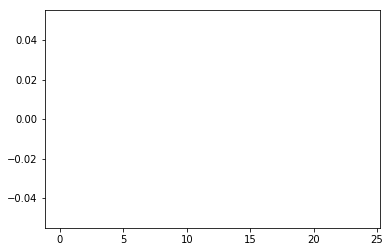

In [43]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [44]:
print(reviews_encoded[135])

IndexError: list index out of range

In [45]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [46]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

X = X[random_posits];
Y = Y[random_posits];

train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu', init='uniform'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid', init='uniform'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))

NameError: name 'word_dict' is not defined

In [48]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.